<a href="https://colab.research.google.com/github/leonardodamata/aula_01/blob/master/aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise dos Dados do Airbnb - Rio de Janeiro**


**Obtenção dos Dados**


In [6]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exibe a saída em linha
# O IPython possui um conjunto de 'funções mágicas' predefinidas que você pode chamar com uma sintaxe no estilo de linha de comando.
%matplotlib inline

In [49]:
#  importar o arquivo listings.csv para um DataFrame
#df = pd.read_csv("https://github.com/leonardodamata/aula_01/raw/master/listings.csv")
# meu csv está com problema na coluna price
df = pd.read_csv("http://data.insideairbnb.com/chile/rm/santiago/2019-03-15/visualisations/listings.csv")

**Análise dos Dados**

In [50]:
# Para Visualizar sucintamente as primeiras linhas de um DataFrame vamos utiliza o método .head()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14576,Dp Valen Castillo 1600,14972,Bruno,NaN,Santiago,-33.46413,-70.64869,Entire home/apt,67025,5,0,NaN,NaN,1,363
1,34552,Big nd nice room + private bathroom,149223,Gladys,NaN,Santiago,-33.46354,-70.64851,Private room,32172,3,0,NaN,NaN,1,365
2,47936,My Flat in English,218471,Nelsk,NaN,Santiago,-33.44791,-70.63547,Private room,36864,1,0,NaN,NaN,1,365
3,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,36864,3,0,NaN,NaN,3,178
4,50466,Great apartment at a great location,231631,Marco,NaN,Santiago,-33.43630,-70.65390,Entire home/apt,56971,1,0,NaN,NaN,1,365


**Q1. Quantos atributos e quantas entradas o nosso conjunto de dados possui? Quais os tipo de variáveis?**

In [51]:
#identificar o volume de dados do DataFrame
print("Entrada:  \t {}".format(df.shape[0]))
print("Atributos descritos:\t {} \n".format(df.shape[1]))
# verificar os tipos de atributos das entradas do dataset
display(df.dtypes)

Entrada:  	 15790
Atributos descritos:	 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Q2. Qual a procentagem de valores ausentes do dataset?**

In [52]:
# ordenar em orgem descresce teas variáveis por seus valores ausentes
(df.isnull().sum()/ df.shape[0]).sort_values( ascending = False)
#isnull().sum() somar os valores que estão nulos no dataset
#shape para um formato determinado

neighbourhood_group               1.000000
reviews_per_month                 0.437619
last_review                       0.437619
name                              0.000887
host_name                         0.000317
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

**Q3. Qual o tipode distrbuição das variáveis**

**Histograma** é a representação gráfica da distribuição de frequência

Um histograma é construído alocando as faixas no eixo horizontal , e as frequência (absoluta ou relativa, acumulada ou não), no eixo vertical. Para cada faixa , é atribuido uma barra , de forma que sua altura represente a frequência da faixa. Na prática a quantidade de faixa é um número aproximado igual à raiz quadrada do tamanho do conjunto de valores.

**K= √número de dados (N)**

**Aprender a interpretar uma histograma**

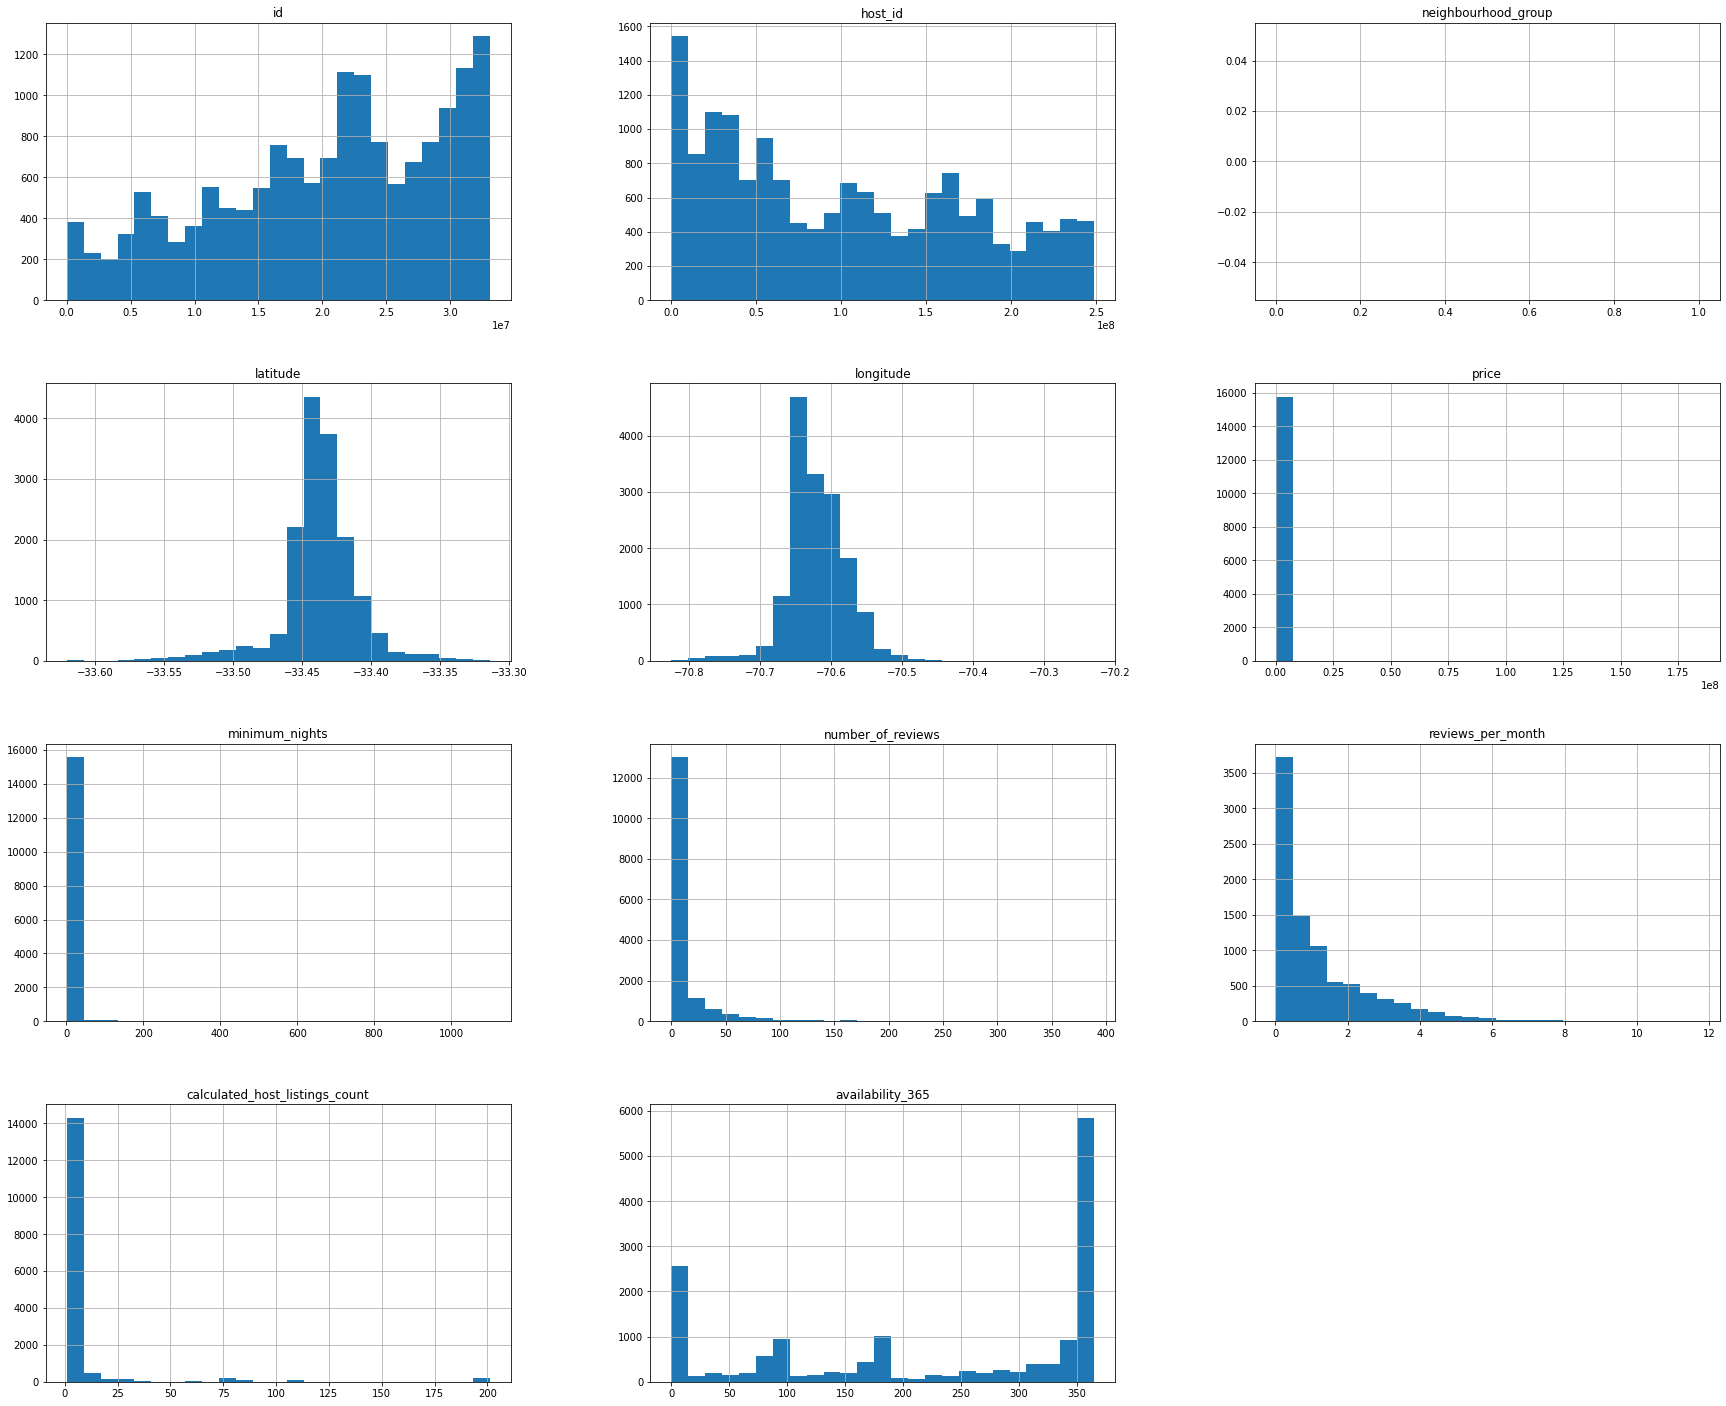

In [53]:
# plotar o histógrama das variáveis numéricas
df.hist(bins=25,figsize=(30,25));
#Porque esse tem ; no final?
# bins e figsize fixar a largura dos gráficos

**Q4. Qual a média dos preços de alguem?**

In [54]:
# ver resumo estatísco das variáveis numéricas
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews
count,1.579000e+04,15790.000000,15790.000000,8880.000000,15790.000000,15790.000000,15790.000000
mean,7.127307e+04,5.084864,10.664725,1.219730,7.512730,225.009246,10.664725
std,1.574417e+06,29.440156,25.302336,1.435516,26.243083,143.189742,25.302336
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.876700e+04,1.000000,0.000000,0.220000,1.000000,88.000000,0.000000
50%,3.016100e+04,2.000000,1.000000,0.660000,1.000000,287.000000,1.000000
75%,4.021500e+04,3.000000,8.000000,1.752500,3.000000,363.000000,8.000000
max,1.838887e+08,1100.000000,389.000000,11.700000,201.000000,365.000000,389.000000


In [55]:
#perguntar o porque o preço não apareceu igual o da Elain. Meu csv está com problema na coluna price
df[['price']].describe()

,price
count,1.579000e+04
mean,7.127307e+04
std,1.574417e+06
min,0.000000e+00
25%,1.876700e+04
50%,3.016100e+04
75%,4.021500e+04
max,1.838887e+08


Questionar:

Como chegou nessa afirmação: A variável price possui valor méda  do valor 71.273 pesso chileno , porém seu valor máximo é 131727.



Boxplot para price **bold text Boxplot** ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados.

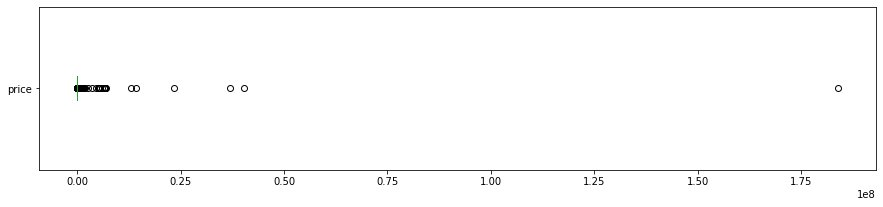


price: Valores acima de 71000
1104 entradas
6.9918%


In [63]:
# price
df.price.plot(kind = 'box', vert = False, figsize = [15,3],);
plt.show();

#ver a quantidade de valores acima de 71000 para price
print("\nprice: Valores acima de 71000")
print("{} entradas".format(len(df[df.price > 71000])))
print("{:.4f}%".format((len(df[df.price > 71000]) / df.shape[0])*100))

**Histogramas sem outliers**

Já que identificamos outliers nas variável price, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

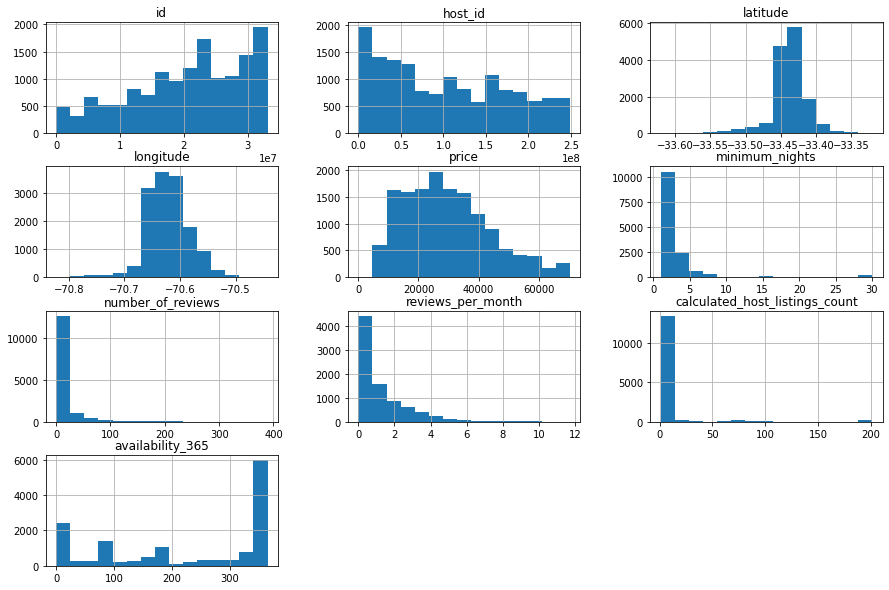

In [69]:
# remover os outliers em um novo dataframe

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 71000].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights >30].index, axis=0, inplace=True)

#remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o histograma para as variáveis númericas
df_clean.hist(bins=15, figsize=(15,10));

**Q4. Qual a correlação existente entre as variáveis**

In [67]:
#criar uma matriz de correlação
# como escolher quais outliers irão participar da correlação? 

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)    

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.043900,0.026733,-0.004703,0.081355,0.097225
minimum_nights,-0.043900,1.000000,-0.033986,-0.100471,-0.044378,-0.020915
number_of_reviews,0.026733,-0.033986,1.000000,0.617522,-0.017241,0.020720
reviews_per_month,-0.004703,-0.100471,0.617522,1.000000,-0.006454,0.001134
calculated_host_listings_count,0.081355,-0.044378,-0.017241,-0.006454,1.000000,0.180715
availability_365,0.097225,-0.020915,0.020720,0.001134,0.180715,1.000000


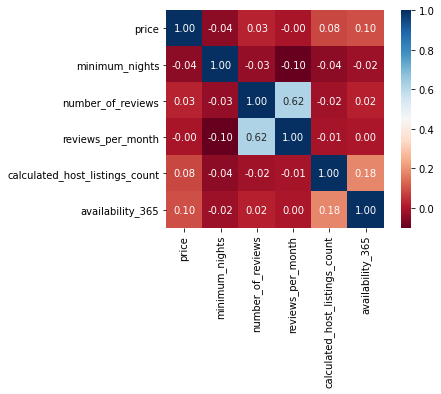

In [78]:
#Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True )
# <matplotlib.axes._subplots.AxesSubplot at 0x7fc9bd0860d0> é um aviso ou um erro?
# olhei no google e vários heatmap apresentam essa informação
# http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/, por exemplo

**Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [79]:
# mostrar a quantidade de cda tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    7829
Private room       6301
Shared room         360
Name: room_type, dtype: int64

In [81]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.540304
Private room       0.434852
Shared room        0.024845
Name: room_type, dtype: float64

**Q6. Qual a localidade mais cara do dataset?**

In [87]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Las Condes      35706.807205
Lo Barnechea    35593.600000
Vitacura        34515.613208
Lo Espejo       33646.400000
Providencia     32280.581241
Lo Prado        28527.437500
Pudahuel        28166.658537
Recoleta        28121.778409
Santiago        27957.651281
Quilicura       27643.609756
Name: price, dtype: float64

In [90]:
# ver a quantidade de imóveis no Las Condes

print(df_clean[df_clean.neighbourhood == "Las Condes"].shape)

(2054, 15)


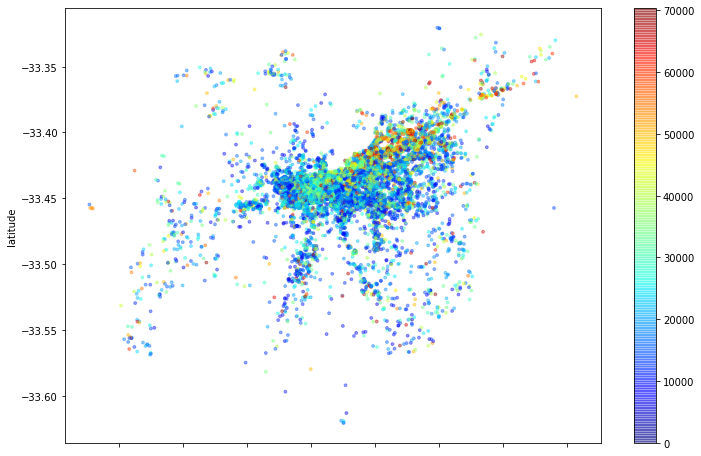

In [92]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

**Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [96]:
# ver a média da coluna minimum_nights

df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,14490.000000,14490.000000,14490.000000,8341.000000,14490.000000,14490.000000
mean,29482.844237,2.698137,11.067426,1.245740,7.951622,224.048033
std,14559.257647,4.122826,25.860687,1.456401,27.318257,143.144771
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,18097.000000,1.000000,0.000000,0.220000,1.000000,88.000000
50%,28150.000000,2.000000,1.000000,0.680000,1.000000,286.000000
75%,38874.000000,3.000000,8.000000,1.820000,3.000000,363.000000
max,70376.000000,30.000000,389.000000,11.700000,201.000000,365.000000


**Conclusões**

Tenho de aprender a interpretar e entender todos os histogramas.

